<h1> Knowledge Discovery & Data Analytics</h1>
<br> December 2022

Clothing apparel

*Develop a model that is capable of classifying two classes of items.Save your trained model to disk in .h5 format*

In [ ]:
import random
## We set these values so that we can reproduce our random selections.
random_seed = 42
random.seed(random_seed) 

In [ ]:
import os
%load_ext autoreload

## Setup environment specific requirements and set paths. This is to accommodate
## running from Google Colab or from a local directory

if( os.path.isdir("/content") ):
  # Setup Specific to Google Colab Environment
 
  print("Running from Google Colab Environment")
                  
  !pip install requests
  !pip install requests-oauthlib
  !pip install ratelimit
  !pip install pyyaml h5py
  
  from google.colab import drive
  drive.mount('/content/drive')
      
  %cd "/content/drive/My Drive/COMP6125/project3"

  sourceDirectory = %pwd
  sourceDirectory = sourceDirectory + "/"
  

  # %aimport XXXX
  # from XXXX import *
  
else:
  # Setup Specific to Local Jupyter Environment
  
  print('Running from Local Jupyter Environment')
 
  sourceDirectory = "./"


## Define common  imports here

from pprint import pprint
import json
from datetime import datetime


processStartTime = datetime.today().strftime('%Y-%m-%d-%H:%M:%S')

Running from Google Colab Environment
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for ratelimit: filename=ratelimit-2.2.1-py3-none-any.whl size=5909 sha256=4e3fa6e25eb112b2b78b2b5c1746e54d25b0ef69fc1320d0925a665ebe629eaa
  Stored in directory: /root/.cache/pip/wheels/8e/34/5e/1dd3d652594bdf5df01109a683a455121d0b726978051bf720
Successfully built ratelimit
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Mounted at /content/drive
/content/drive/My Drive/COMP6125/project3


## Modul Import

In [ ]:
import os
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers
from tensorflow.keras import Model

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2022-12-09 22:15:35--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.193.128, 172.217.204.128, 172.217.203.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.193.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M   171MB/s    in 0.5s    

2022-12-09 22:15:36 (171 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'
pre_trained_model = InceptionV3(
    input_shape=(150, 150, 3), include_top=False, weights=None)
pre_trained_model.load_weights(local_weights_file)

In [ ]:
for layer in pre_trained_model.layers:
  layer.trainable = False

The layer we will use for feature extraction in Inception v3 is called `mixed7`. It is not the bottleneck of the network, but we are using it to keep a sufficiently large feature map (7x7 in this case). (Using the bottleneck layer would have resulting in a 3x3 feature map, which is a bit small.) Let's get the output from `mixed7`:

In [ ]:
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape:', last_layer.output_shape)
last_output = last_layer.output

last layer output shape: (None, 7, 7, 768)


In [ ]:
from tensorflow.keras.optimizers import RMSprop

# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)
# Add a final sigmoid layer for classification
x = layers.Dense(1, activation='sigmoid')(x)

# Configure and compile the model
model = Model(pre_trained_model.input, x)
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.0001),
              metrics=['acc'])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


## Dataset Import and Augmentation

In [ ]:
!pwd

/content/drive/My Drive/COMP6125/project3


In [ ]:
import os
import zipfile

from tensorflow.keras.preprocessing.image import ImageDataGenerator

local_zip = '/content/drive/My Drive/COMP6125/project3/tmp/Image Recognition Project.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

# Define our example directories and files
base_dir = '/tmp/Image Recognition Project'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_100_dir = os.path.join(train_dir, '100')
train_100_dir_len= len(next(os.walk(train_100_dir))[2])

# Directory with our training dog pictures
train_50_dir = os.path.join(train_dir, '50')
train_50_dir_len= len(next(os.walk(train_50_dir))[2])

# Directory with our validation cat pictures
validation_100_dir = os.path.join(validation_dir, '100')
validation_100_dir_len= len(next(os.walk(validation_100_dir))[2])

# Directory with our validation dog pictures
validation_50_dir = os.path.join(validation_dir, '50')
validation_50_dir_len= len(next(os.walk(validation_50_dir))[2])

train_cat_fnames = os.listdir(train_100_dir)
train_dog_fnames = os.listdir(train_50_dir)

# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# Note that the validation data should not be augmented!
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir, # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 406 images belonging to 2 classes.
Found 102 images belonging to 2 classes.


## Sample of Train Data

###100s

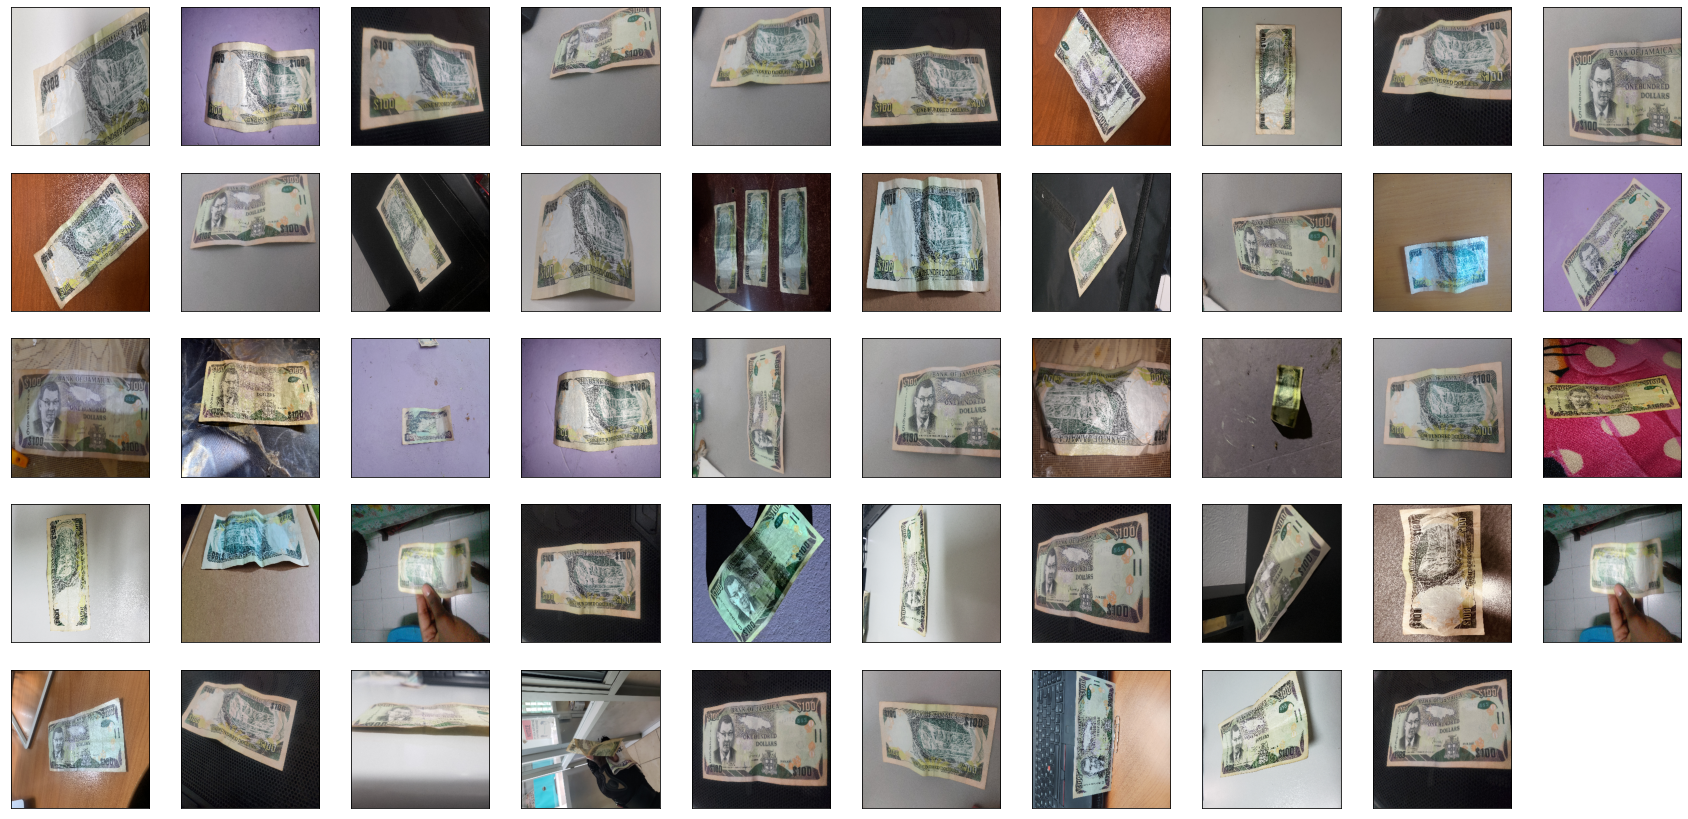

In [ ]:
import matplotlib.pyplot as plt
from pathlib import Path
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img,save_img
i = 1
plt.figure(figsize=(30,30))
for file in [i for i in Path(train_dir,'100').glob("*") if i.is_file()]:
  # plt.figure(i)
  img = load_img(file,target_size=(300, 300))  # this is a PIL image
  plt.subplot(10,10,i)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(img) 

  i+= 1
  if i >= 50:
    break



50s

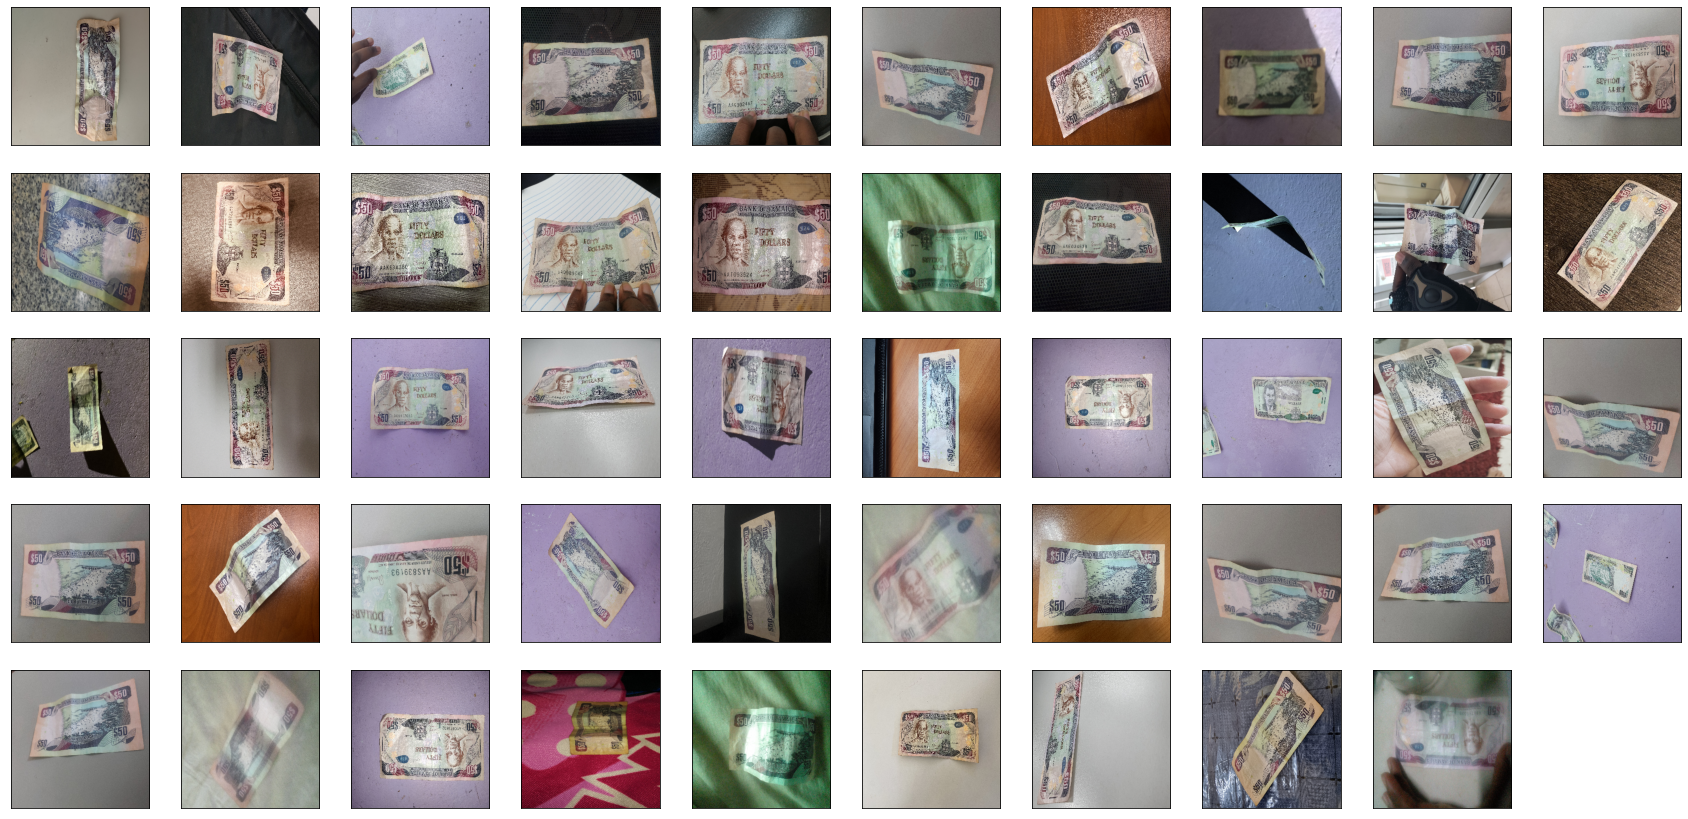

In [ ]:
import matplotlib.pyplot as plt
from pathlib import Path
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img,save_img
i = 1
plt.figure(figsize=(30,30))
for file in [i for i in Path(train_dir,'50').glob("*") if i.is_file()]:
  # plt.figure(i)
  img = load_img(file,target_size=(300, 300))  # this is a PIL image
  plt.subplot(10,10,i)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(img) 

  i+= 1
  if i >= 50:
    break



## Sample of Validate Data

###100s

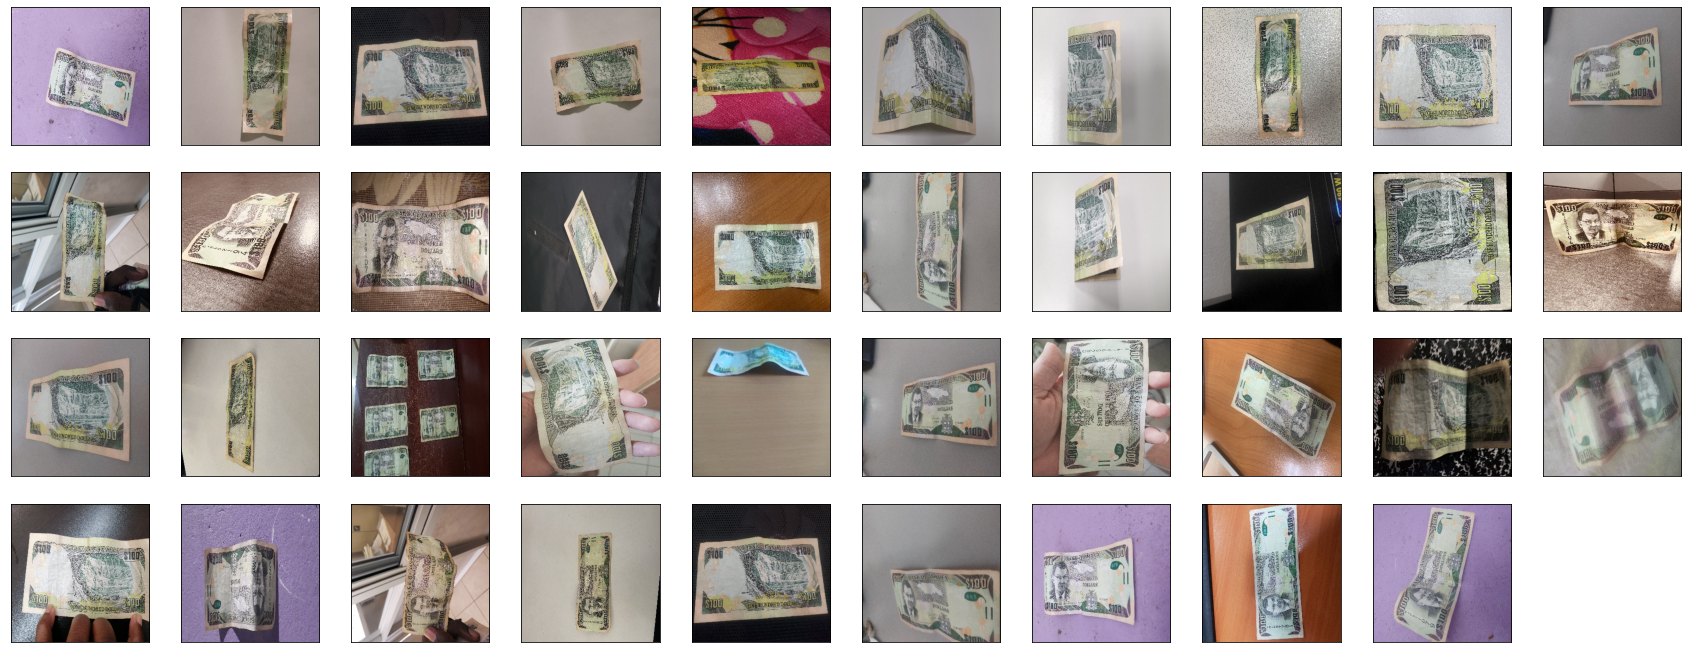

In [ ]:
import matplotlib.pyplot as plt
from pathlib import Path
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img,save_img
i = 1
plt.figure(figsize=(30,30))
for file in [i for i in Path(validation_dir,'100').glob("*") if i.is_file()]:
  # plt.figure(i)
  img = load_img(file,target_size=(300, 300))  # this is a PIL image
  plt.subplot(10,10,i)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(img) 

  i+= 1
  if i >= 40:
    break



50s

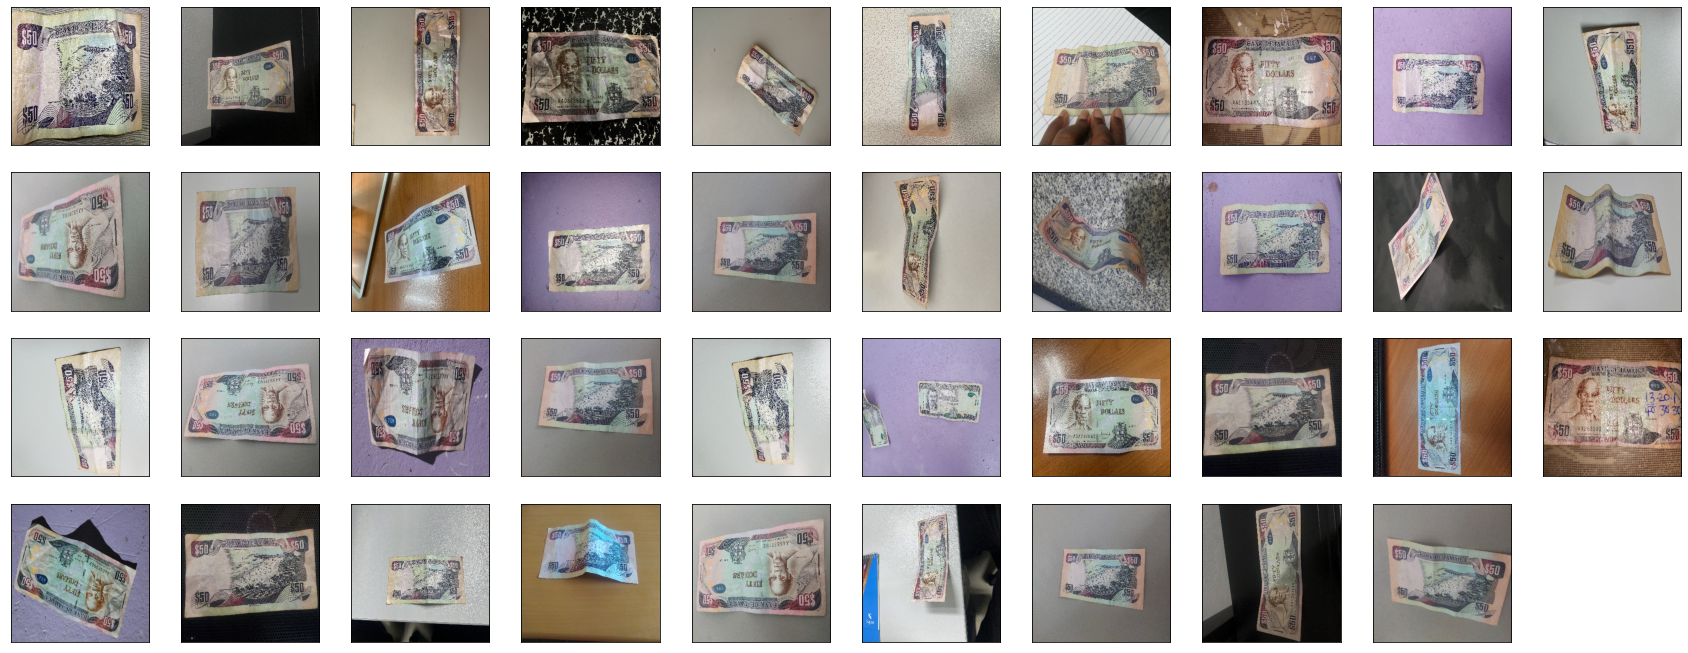

In [ ]:
import matplotlib.pyplot as plt
from pathlib import Path
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img,save_img
i = 1
plt.figure(figsize=(30,30))
for file in [i for i in Path(validation_dir,'50').glob("*") if i.is_file()]:
  # plt.figure(i)
  img = load_img(file,target_size=(300, 300))  # this is a PIL image
  plt.subplot(10,10,i)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(img) 

  i+= 1
  if i >= 40:
    break



## Model Training and Fine-Tuning

In [ ]:
history= model.fit_generator(
      train_generator,
      steps_per_epoch=(train_100_dir_len + train_50_dir_len )//20,
      epochs=3,
      validation_data=validation_generator,
      validation_steps=(validation_100_dir_len + validation_50_dir_len)//20,
      verbose=2)

<ipython-input-15-3bbbc73dc696>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history= model.fit_generator(


Epoch 1/3
20/20 - 152s - loss: 1.0386 - acc: 0.5600 - val_loss: 0.5852 - val_acc: 0.6900 - 152s/epoch - 8s/step
Epoch 2/3
20/20 - 132s - loss: 0.6581 - acc: 0.6554 - val_loss: 0.8179 - val_acc: 0.5500 - 132s/epoch - 7s/step
Epoch 3/3
20/20 - 138s - loss: 0.5955 - acc: 0.7202 - val_loss: 0.4508 - val_acc: 0.8100 - 138s/epoch - 7s/step


In [ ]:
from tensorflow.keras.optimizers import SGD

unfreeze = False

# Unfreeze all models after "mixed6"
for layer in pre_trained_model.layers:
  if unfreeze:
    layer.trainable = True
  if layer.name == 'mixed6':
    unfreeze = True

# As an optimizer, here we will use SGD 
# with a very low learning rate (0.00001)
model.compile(loss='binary_crossentropy',
              optimizer=SGD(
                  lr=0.00001, 
                  momentum=0.9),
              metrics=['acc'])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
history=model.fit_generator(
      train_generator,
      steps_per_epoch=(train_100_dir_len + train_50_dir_len)//20,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=(validation_100_dir_len + validation_50_dir_len)//20,
      verbose=2)

<ipython-input-17-4d61d1132ab1>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(


Epoch 1/20
20/20 - 151s - loss: 0.5172 - acc: 0.7539 - val_loss: 0.4600 - val_acc: 0.7900 - 151s/epoch - 8s/step
Epoch 2/20
20/20 - 136s - loss: 0.5270 - acc: 0.7720 - val_loss: 0.4682 - val_acc: 0.8100 - 136s/epoch - 7s/step
Epoch 3/20
20/20 - 142s - loss: 0.5324 - acc: 0.7694 - val_loss: 0.4754 - val_acc: 0.8100 - 142s/epoch - 7s/step
Epoch 4/20
20/20 - 144s - loss: 0.5326 - acc: 0.7539 - val_loss: 0.4868 - val_acc: 0.8000 - 144s/epoch - 7s/step
Epoch 5/20
20/20 - 140s - loss: 0.5388 - acc: 0.7409 - val_loss: 0.4900 - val_acc: 0.8200 - 140s/epoch - 7s/step
Epoch 6/20
20/20 - 143s - loss: 0.4939 - acc: 0.7876 - val_loss: 0.4919 - val_acc: 0.8300 - 143s/epoch - 7s/step
Epoch 7/20
20/20 - 142s - loss: 0.5347 - acc: 0.7720 - val_loss: 0.4974 - val_acc: 0.8200 - 142s/epoch - 7s/step
Epoch 8/20
20/20 - 146s - loss: 0.5278 - acc: 0.7461 - val_loss: 0.5015 - val_acc: 0.8100 - 146s/epoch - 7s/step
Epoch 9/20
20/20 - 139s - loss: 0.5050 - acc: 0.7824 - val_loss: 0.4960 - val_acc: 0.8200 - 139s

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 74, 74, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 74, 74, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                              

In [ ]:
#save model to hdf5 format
model.save('/content/drive/My Drive/COMP6125/project3/bank_notes.h5') 

In [ ]:
# Recreate the exact same model, including its weights and the optimizer
new_model = tf.keras.models.load_model('/content/drive/My Drive/COMP6125/project3/bank_notes.h5')

# Show the model architecture
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 74, 74, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 74, 74, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                              

## Testing

The saved model imported to test aganinst photos.

In [ ]:
import cv2

def predictImage(imgLocation):
  img=cv2.imread(imgLocation)  # where f_path is the path to the image file
  img=cv2.resize(img, (150,150), interpolation = cv2.INTER_AREA)  
  img=img/255
  predictions=new_model.predict(np.expand_dims(img, axis=0))
  pre_class=predictions.argmax()
  print(predictions[0])
  if predictions[0]>=0.5:
    return "50 JMD"
  else:
    return "100 JMD"

predictImage("/content/drive/My Drive/COMP6125/project3/fifla_2.jpg")

1/1 [==============================] - 1s 1s/step
[0.7088374]


'50 JMD'

In [ ]:
predictImage("/content/drive/My Drive/COMP6125/project3/hunnid_3.jpg")

1/1 [==============================] - 0s 88ms/step
[0.4946691]


'100 JMD'

Text(0.5, 1.0, 'Training and validation loss')

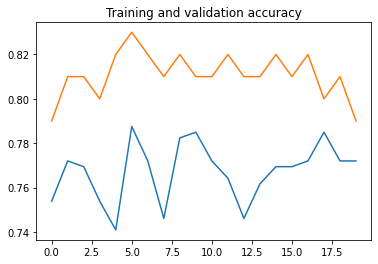

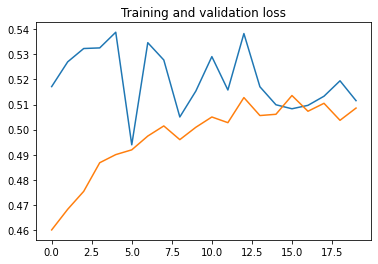

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))


plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

## Predict Images

In [1]:
import os
import cv2
import tensorflow as tf
from pathlib import Path
import numpy as np
from tensorflow.keras.utils import img_to_array
from tensorflow.keras import layers
from tensorflow.keras import Model
import ipywidgets as widgets
from ipywidgets import HBox, VBox, Layout

In [2]:
# Recreate the exact same model, including its weights and the optimizer
new_model = tf.keras.models.load_model('bank_notes.h5')

In [3]:
w1 = widgets.FileUpload(
    accept='image/*',  # Accepted file extension e.g. '.txt', '.pdf', 'image/*', 'image/*,.pdf'
    multiple=False  # True to accept multiple files upload else False
)
w2 = widgets.Button(
    description='Predict',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Click me',
    icon='image' # (FontAwesome names without the `fa-` prefix)
)
w2.style.button_color = 'silver'

debug_view = widgets.Output()

def on_upload_change(change):

    main_container.children = main_container.children[:-1]

def predict(image):
    img=cv2.imdecode(np.frombuffer(image, np.uint8), -1)
    img=cv2.resize(img, (150,150), interpolation = cv2.INTER_AREA)  
    img=img/255
    predictions=new_model.predict(np.expand_dims(img, axis=0))
    pre_class=predictions.argmax()
    if predictions[0]>=0.6:
        print("This image contains $50")
    else:
        print("This image contains $100")    

@debug_view.capture(clear_output=True)
def show_image(btn):
   
    # if(w1.value):
    if(len(list(w1.value.items()))>0):
        image = list(w1.value.items())[0][1]['content']
        # image = w1.value[0]["content"]
        w3=widgets.Image(
        value=image,
        format='png',
        width=100,
        height=200,
        )
        
        main_container.children = main_container.children  + (VBox([w3,debug_view]),)
        
        predict(image)

    else:
        print("Please upload an image")

w1.observe(on_upload_change, names='_counter')
w2.on_click(show_image)

main_container = HBox([w1,w2,VBox([debug_view])])
main_container

## Clean Up

Run the following cell to terminate the kernel and free memory resources:

In [ ]:
import os, signal
os.kill(os.getpid(), signal.SIGKILL)